In [43]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

plt.style.use('seaborn')
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [80]:
imagepath = Path('../images')
datapath = Path('../data')

full = 'cleaned_full_1.csv'
df = pd.read_csv(datapath/full)

In [81]:
demos = [c for c in df.columns if 'demo' in c]
df[demos].head()

,demo_politics,demo_party,demo_parents0,demo_parents1,demo_parents2,demo_parents3,demo_parents4,demo_sex,demo_age,demo_edu,demo_sibs1,demo_sibs2,demo_sibs3,demo_sibs4,demo_sibs5,demo_sibs6,demo_sibs7,demo_race,demo_mil,demo_mil_years,demo_income,demo_us,demo_us_years,demo_state,demo_duration,demo_age_bin,demo_race_bin,demo_mil_years_bin,demo_us_years_bin
0,2.0,3.0,0,0,1,0,0,2.0,20.0,2.0,0,1,0,0,0,0,0,1,0.0,0.0,3.0,0.0,0.0,0.0,0.00,20,1,0,0
1,1.0,4.0,0,1,0,0,0,1.0,23.0,5.0,0,1,0,0,0,0,0,1,0.0,0.0,3.0,0.0,0.0,0.0,0.00,23-25,1,0,0
2,2.0,8.0,0,1,0,0,0,1.0,23.0,2.0,0,0,0,0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.00,23-25,1,0,0
3,8.0,8.0,0,1,0,0,0,2.0,22.0,2.0,0,0,1,0,1,0,1,6,0.0,0.0,1.0,0.0,0.0,0.0,0.00,22,6,0,0
4,8.0,3.0,0,1,0,0,0,2.0,21.0,2.0,0,1,1,1,1,0,0,"1,3",0.0,0.0,7.0,1.0,21.0,4.0,0.11,21,"1,3",0,18-25


In [82]:
df.demo_sex.count()

2826

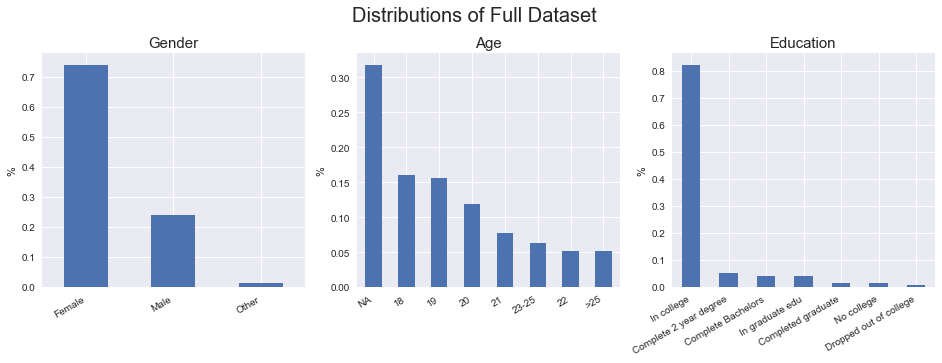

In [79]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
ax1, ax2, ax3 = axes.flatten()

sex = df.demo_sex.value_counts() / df.demo_sex.count()
ax1 = sex.plot(kind="bar", ax=ax1)
ax1.set_xticklabels(['Female', 'Male', 'Other'], rotation=0)
ax1.set_title('Gender', size=15)
ax1.set_ylabel('%')

age = df.demo_age_bin.value_counts() / df.demo_age_bin.count()
ax2 = age.plot(kind='bar', rot=0, ax=ax2)
ax2.set_title('Age', size=15)
ax2.set_ylabel('%')

edu = df.demo_edu.value_counts() / df.demo_edu.count()
ax3 = edu.plot(kind='bar', rot=0, ax=ax3)
ax3.set_xticklabels(['In college', 'Complete 2 year degree', 'Complete Bachelors', 
                     'In graduate edu', 'Completed graduate', 'No college', 'Dropped out of college'], rotation=90)
ax3.set_title('Education', size=15)
ax3.set_ylabel('%')

# fig.tight_layout()
fig.autofmt_xdate()
fig.suptitle('Distributions of Full Dataset', size=20)
plt.subplots_adjust(top=0.85)
plt.savefig(imagepath/'demo_dist_full_df.png', dpi=300)